In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from pathlib import Path

# Set up paths
base_dir = Path("~/airflow/dags/data").expanduser()
raw_dir = base_dir / "raw"
processed_dir = base_dir / "processed"
output_dir = base_dir / "outputs"

# Set visualization style
plt.style.use('ggplot')
%matplotlib inline

In [3]:
# Load historical weather data
historical = pd.read_csv(raw_dir / 'historical_weather.csv')
print("Historical Weather Data:")
display(historical.head())
print(f"\nShape: {historical.shape}")
print("\nMissing values:")
display(historical.isna().sum())

# Load current weather data
current = pd.read_csv(raw_dir / 'current_weather.csv')
print("\nCurrent Weather Data:")
display(current.head())
print(f"\nShape: {current.shape}")
print("\nMissing values:")
display(current.isna().sum())

# Load merged data
merged = pd.read_csv(processed_dir / 'merged_weather_data.csv')
print("\nMerged Weather Data:")
display(merged.head())
print(f"\nShape: {merged.shape}")
print("\nMissing values:")
display(merged.isna().sum())

# Load weather scores
scores = pd.read_csv(output_dir / 'monthly_weather_scores.csv')
print("\nWeather Scores Data:")
display(scores.head())
print(f"\nShape: {scores.shape}")
print("\nMissing values:")
display(scores.isna().sum())

Historical Weather Data:


,city,date,month,year,avg_temp,precipitation,wind_speed
0,Paris,2018-01-01,1,2018,3.3,48.3,9.1
1,Paris,2018-02-01,2,2018,4.9,10.4,10.6
2,Paris,2018-03-01,3,2018,4.0,39.7,9.9
3,Paris,2018-04-01,4,2018,7.8,43.4,11.2
4,Paris,2018-05-01,5,2018,15.3,43.0,8.6



Shape: (588, 7)

Missing values:


city             0
date             0
month            0
year             0
avg_temp         0
precipitation    0
wind_speed       0
dtype: int64


Current Weather Data:


,city,date,temp,precipitation,wind_speed,humidity
0,Paris,2025-06-28,27.13,0,3.60,59
1,London,2025-06-28,25.96,0,5.14,64
2,New York,2025-06-28,28.84,0,5.66,67
3,Tokyo,2025-06-28,25.18,0,2.06,65
4,Antananarivo,2025-06-28,15.98,0,3.09,100



Shape: (7, 6)

Missing values:


city             0
date             0
temp             0
precipitation    0
wind_speed       0
humidity         0
dtype: int64


Merged Weather Data:


,city,date,month,year,temp,precipitation,wind_speed,humidity
0,Paris,2023-01-01,1,2018.0,-1.0,20.5,11.2,NaN
1,Paris,2023-02-01,2,2018.0,3.9,30.9,10.1,NaN
2,Paris,2023-03-01,3,2018.0,8.3,39.4,11.3,NaN
3,Paris,2023-04-01,4,2018.0,12.2,31.3,11.7,NaN
4,Paris,2023-05-01,5,2018.0,11.9,22.0,10.1,NaN



Shape: (595, 8)

Missing values:


city               0
date               0
month              0
year               7
temp               0
precipitation      0
wind_speed         0
humidity         588
dtype: int64


Weather Scores Data:


,city,month,weather_score,temp,precipitation,wind_speed
0,Antananarivo,1,0.321800,12.014286,28.542857,9.257143
1,Antananarivo,2,0.318629,13.200000,28.314286,10.142857
2,Antananarivo,3,0.366086,15.371429,27.971429,9.428571
3,Antananarivo,4,0.556829,19.085714,16.342857,9.842857
4,Antananarivo,5,0.698443,23.814286,37.185714,10.214286



Shape: (84, 6)

Missing values:


city             0
month            0
weather_score    0
temp             0
precipitation    0
wind_speed       0
dtype: int64

In [4]:
# Check data types
print("Historical data types:")
display(historical.dtypes)

print("\nCurrent data types:")
display(current.dtypes)

print("\nMerged data types:")
display(merged.dtypes)

print("\nScores data types:")
display(scores.dtypes)

# Check for duplicates
print("\nDuplicate rows in historical data:", historical.duplicated().sum())
print("Duplicate rows in current data:", current.duplicated().sum())
print("Duplicate rows in merged data:", merged.duplicated().sum())
print("Duplicate rows in scores data:", scores.duplicated().sum())

# Check unique values
print("\nUnique cities in historical data:", historical['city'].unique())
print("Unique months in historical data:", sorted(historical['month'].unique()))

Historical data types:


city              object
date              object
month              int64
year               int64
avg_temp         float64
precipitation    float64
wind_speed       float64
dtype: object


Current data types:


city              object
date              object
temp             float64
precipitation      int64
wind_speed       float64
humidity           int64
dtype: object


Merged data types:


city              object
date              object
month              int64
year             float64
temp             float64
precipitation    float64
wind_speed       float64
humidity         float64
dtype: object


Scores data types:


city              object
month              int64
weather_score    float64
temp             float64
precipitation    float64
wind_speed       float64
dtype: object


Duplicate rows in historical data: 0
Duplicate rows in current data: 0
Duplicate rows in merged data: 0
Duplicate rows in scores data: 0

Unique cities in historical data: ['Paris' 'London' 'New York' 'Tokyo' 'Antananarivo' 'Rio de Janeiro'
 'Sydney']
Unique months in historical data: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]


In [5]:
# Historical data stats
print("Historical Data Statistics:")
display(historical.groupby('city').describe())

# Current data stats
print("\nCurrent Data Statistics:")
display(current.describe())

# Scores data stats
print("\nScores Data Statistics:")
display(scores.groupby('city').describe())

Historical Data Statistics:


month                                             year          \
               count mean       std  min   25%  50%   75%   max count    mean   
city                                                                            
Antananarivo    84.0  6.5  3.472786  1.0  3.75  6.5  9.25  12.0  84.0  2021.0   
London          84.0  6.5  3.472786  1.0  3.75  6.5  9.25  12.0  84.0  2021.0   
New York        84.0  6.5  3.472786  1.0  3.75  6.5  9.25  12.0  84.0  2021.0   
Paris           84.0  6.5  3.472786  1.0  3.75  6.5  9.25  12.0  84.0  2021.0   
Rio de Janeiro  84.0  6.5  3.472786  1.0  3.75  6.5  9.25  12.0  84.0  2021.0   
Sydney          84.0  6.5  3.472786  1.0  3.75  6.5  9.25  12.0  84.0  2021.0   
Tokyo           84.0  6.5  3.472786  1.0  3.75  6.5  9.25  12.0  84.0  2021.0   

                ... precipitation       wind_speed                            \
                ...           75%   max      count       mean       std  min   
city            ...                                                            
Antananarivo    ...        68.575  94.0       84.0  10.092857  1.213656  8.0   
London          ...        69.925  97.9       84.0  10.167857  1.160096  8.1   
New York        ...        67.900  96.8       84.0  10.036905  1.151404  8.0   
Paris           ...        70.600  95.6       84.0  10.085714  1.136486  8.1   
Rio de Janeiro  ...        70.350  97.0       84.0   9.969048  1.159869  8.0   
Sydney          ...        68.300  87.0       84.0   9.894048  1.149264  8.0   
Tokyo           ...        66.325  99.9       84.0   9.921429  0.994936  8.0   

                                            
                  25%    50%     75%   max  
city                                        
Antananarivo    9.000  10.20  11.325  12.0  
London          9.300  10.20  11.100  12.0  
New York        9.200  10.20  11.025  11.9  
Paris           9.100  10.10  11.100  12.0  
Rio de Janeiro  9.175   9.95  10.925  12.0  
Sydney          8.900   9.75  10.900  12.0  
Tokyo           9.200   9.75  10.700  11.8  

[7 rows x 40 columns]


Current Data Statistics:


,temp,precipitation,wind_speed,humidity
count,7.000000,7.0,7.000000,7.000000
mean,22.130000,0.0,4.041429,74.714286
std,7.593644,0.0,1.307318,15.052290
min,7.640000,0.0,2.060000,59.000000
25%,20.080000,0.0,3.345000,64.500000
50%,25.180000,0.0,3.600000,67.000000
75%,26.545000,0.0,5.140000,84.000000
max,28.840000,0.0,5.660000,100.000000



Scores Data Statistics:


month                                            weather_score  \
               count mean       std  min   25%  50%   75%   max         count   
city                                                                            
Antananarivo    12.0  6.5  3.605551  1.0  3.75  6.5  9.25  12.0          12.0   
London          12.0  6.5  3.605551  1.0  3.75  6.5  9.25  12.0          12.0   
New York        12.0  6.5  3.605551  1.0  3.75  6.5  9.25  12.0          12.0   
Paris           12.0  6.5  3.605551  1.0  3.75  6.5  9.25  12.0          12.0   
Rio de Janeiro  12.0  6.5  3.605551  1.0  3.75  6.5  9.25  12.0          12.0   
Sydney          12.0  6.5  3.605551  1.0  3.75  6.5  9.25  12.0          12.0   
Tokyo           12.0  6.5  3.605551  1.0  3.75  6.5  9.25  12.0          12.0   

                          ... precipitation            wind_speed             \
                    mean  ...           75%        max      count       mean   
city                      ...                                                  
Antananarivo    0.459268  ...     68.407143  81.200000       12.0   9.845417   
London          0.274888  ...     68.300000  83.971429       12.0   9.653304   
New York        0.315780  ...     68.167857  79.185714       12.0   9.886488   
Paris           0.286507  ...     72.871429  81.957143       12.0  10.018125   
Rio de Janeiro  0.494817  ...     63.810714  79.842857       12.0   9.694792   
Sydney          0.421862  ...     68.575000  83.300000       12.0   9.878676   
Tokyo           0.379250  ...     70.928571  82.514286       12.0   9.909196   

                                                                               
                     std       min       25%        50%        75%        max  
city                                                                           
Antananarivo    0.495601  9.145000  9.410714   9.921429  10.160714  10.828571  
London          0.624508  8.885714  9.246429   9.505536  10.032143  10.828571  
New York        0.545571  8.695000  9.600000   9.978571  10.135714  10.828571  
Paris           0.575990  8.617500  9.857143  10.107143  10.335714  10.885714  
Rio de Janeiro  0.359339  9.137500  9.435714   9.757143   9.957143  10.228571  
Sydney          0.531506  8.985714  9.382143  10.007143  10.164286  10.600000  
Tokyo           0.474665  9.128571  9.625000   9.885714  10.157143  10.700000  

[7 rows x 40 columns]

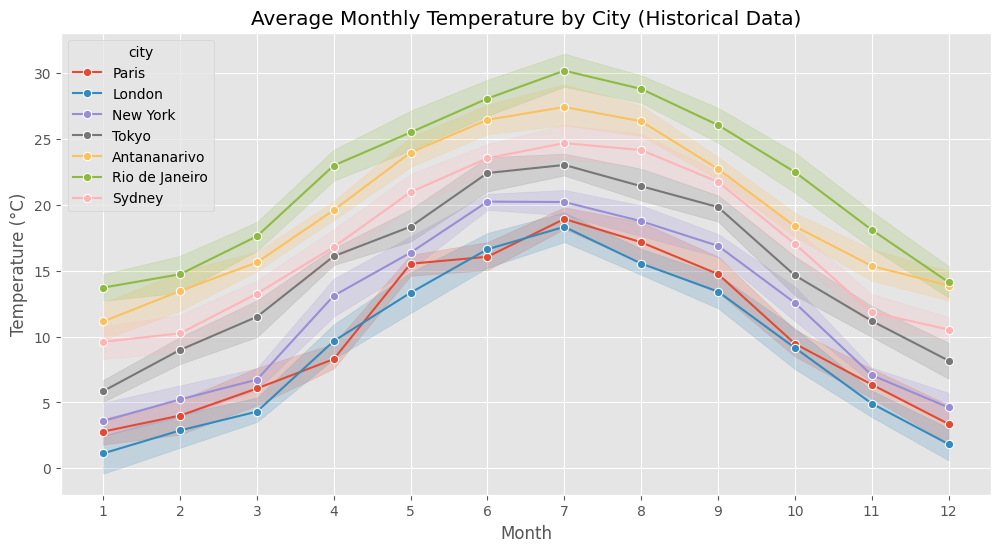

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=historical, x='month', y='avg_temp', hue='city', marker='o')
plt.title('Average Monthly Temperature by City (Historical Data)')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

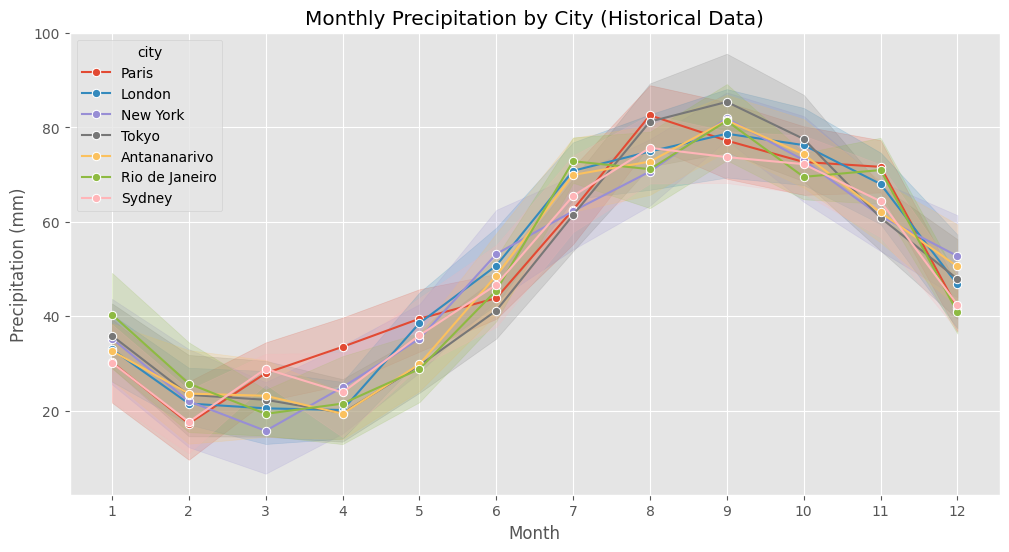

In [7]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=historical, x='month', y='precipitation', hue='city', marker='o')
plt.title('Monthly Precipitation by City (Historical Data)')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

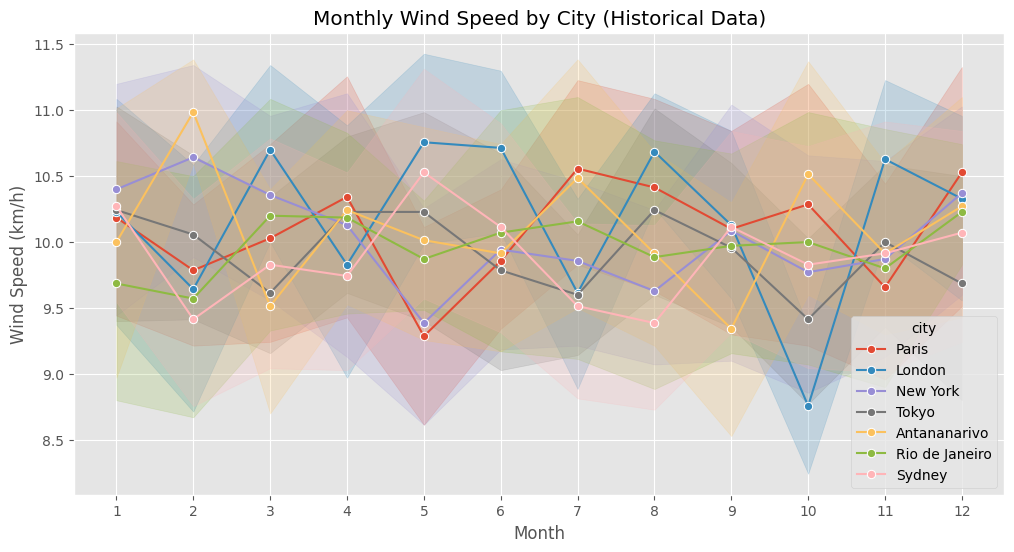

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=historical, x='month', y='wind_speed', hue='city', marker='o')
plt.title('Monthly Wind Speed by City (Historical Data)')
plt.xlabel('Month')
plt.ylabel('Wind Speed (km/h)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

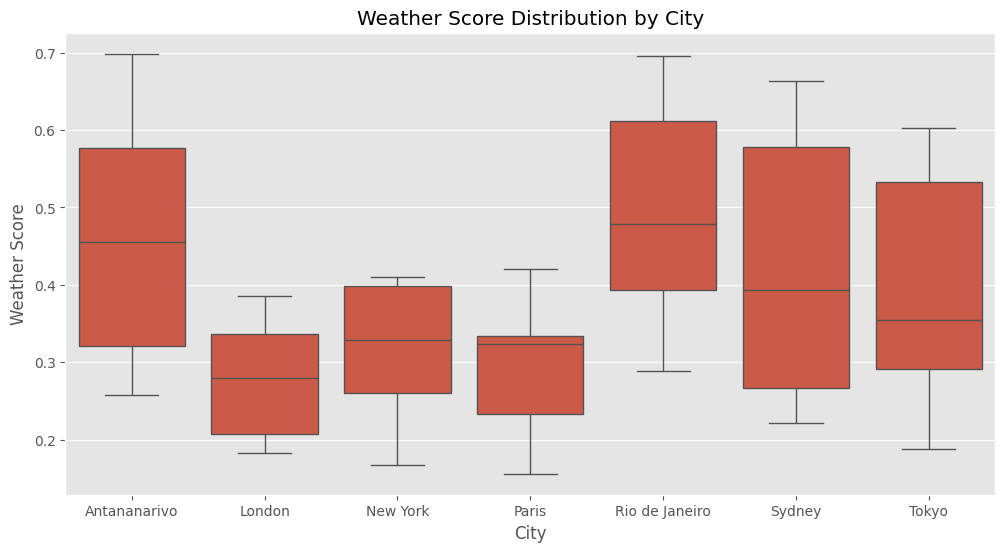

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=scores, x='city', y='weather_score')
plt.title('Weather Score Distribution by City')
plt.xlabel('City')
plt.ylabel('Weather Score')
plt.show()

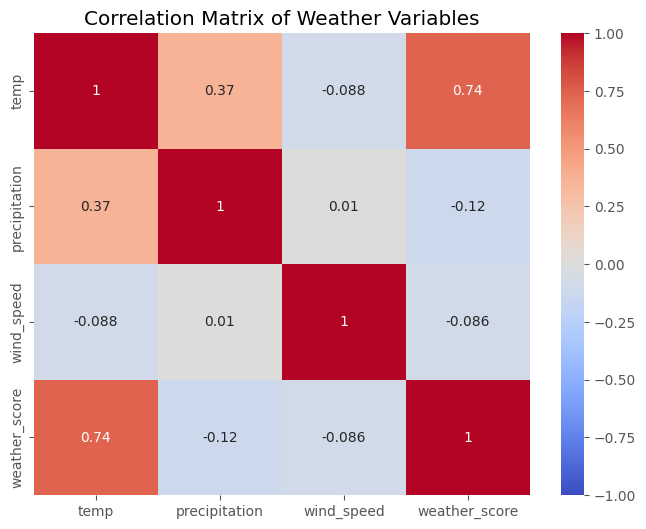

In [10]:
# Calculate correlation matrix for scores data
corr = scores[['temp', 'precipitation', 'wind_speed', 'weather_score']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Weather Variables')
plt.show()

In [13]:
# Get current month (June)
current_month = 6

# Filter historical data for June and select only numeric columns for mean
historical_june = (
	historical[historical['month'] == current_month]
	.groupby('city')[['avg_temp', 'precipitation', 'wind_speed']]
	.mean()
)

# Prepare current data
current_comparison = current[['city', 'temp', 'precipitation', 'wind_speed']].set_index('city')

# Combine for comparison
comparison = historical_june.join(current_comparison, rsuffix='_current')

# Calculate differences
comparison['temp_diff'] = comparison['temp'] - comparison['avg_temp']
comparison['precip_diff'] = comparison['precipitation'] - comparison['precipitation']
comparison['wind_diff'] = comparison['wind_speed'] - comparison['wind_speed']

display(comparison)

,avg_temp,precipitation,wind_speed,temp,precipitation_current,wind_speed_current,temp_diff,precip_diff,wind_diff
city,,,,,,,,,
Antananarivo,26.457143,48.600000,9.914286,15.98,0,3.09,-10.477143,0.0,0.0
London,16.628571,50.700000,10.714286,25.96,0,5.14,9.331429,0.0,0.0
New York,20.242857,53.171429,9.942857,28.84,0,5.66,8.597143,0.0,0.0
Paris,16.057143,43.814286,9.857143,27.13,0,3.60,11.072857,0.0,0.0
Rio de Janeiro,28.071429,45.442857,10.071429,24.18,0,5.14,-3.891429,0.0,0.0
Sydney,23.542857,46.657143,10.114286,7.64,0,3.60,-15.902857,0.0,0.0
Tokyo,22.414286,41.171429,9.785714,25.18,0,2.06,2.765714,0.0,0.0


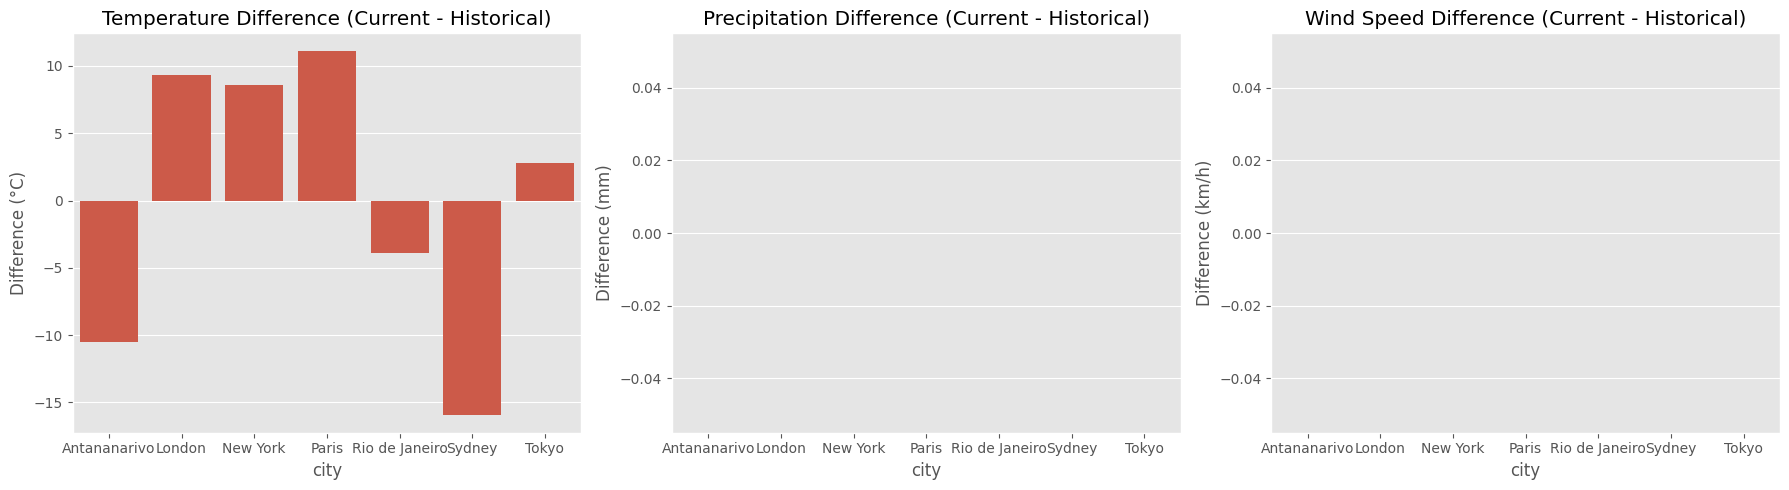

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Temperature difference
sns.barplot(data=comparison.reset_index(), x='city', y='temp_diff', ax=axes[0])
axes[0].set_title('Temperature Difference (Current - Historical)')
axes[0].set_ylabel('Difference (°C)')

# Precipitation difference
sns.barplot(data=comparison.reset_index(), x='city', y='precip_diff', ax=axes[1])
axes[1].set_title('Precipitation Difference (Current - Historical)')
axes[1].set_ylabel('Difference (mm)')

# Wind speed difference
sns.barplot(data=comparison.reset_index(), x='city', y='wind_diff', ax=axes[2])
axes[2].set_title('Wind Speed Difference (Current - Historical)')
axes[2].set_ylabel('Difference (km/h)')

plt.tight_layout()
plt.show()

Best Travel Months by City:


,city,month,weather_score,temp,precipitation,wind_speed
4,Antananarivo,5,0.698443,23.814286,37.185714,10.214286
5,Antananarivo,6,0.666700,25.640000,49.200000,9.145000
7,Antananarivo,8,0.577029,26.885714,74.942857,10.242857
17,London,6,0.386150,16.971250,44.112500,9.482500
13,London,2,0.345014,1.542857,22.042857,8.885714
15,London,4,0.340571,7.714286,22.000000,9.342857
30,New York,7,0.410143,19.442857,72.142857,9.557143
28,New York,5,0.404471,17.200000,37.271429,9.371429
29,New York,6,0.401900,17.528750,45.862500,8.695000
41,Paris,6,0.420513,18.707500,48.062500,8.617500


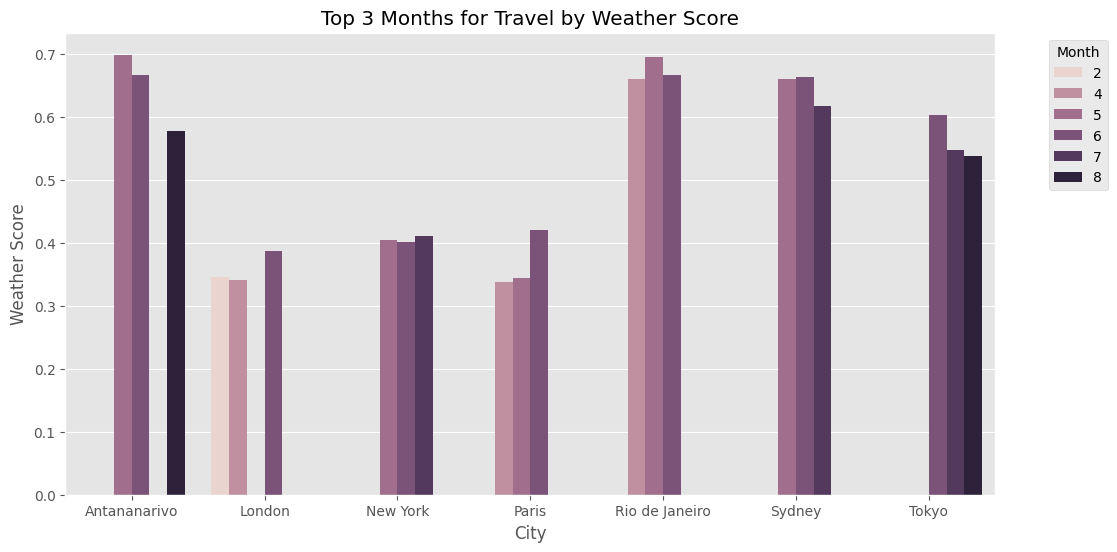

In [14]:
# Find top 3 months for each city by weather score
best_months = scores.loc[scores.groupby('city')['weather_score'].nlargest(3).index.get_level_values(1)]
best_months = best_months.sort_values(['city', 'weather_score'], ascending=[True, False])

print("Best Travel Months by City:")
display(best_months)

# Visualize best months
plt.figure(figsize=(12, 6))
sns.barplot(data=best_months, x='city', y='weather_score', hue='month')
plt.title('Top 3 Months for Travel by Weather Score')
plt.xlabel('City')
plt.ylabel('Weather Score')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()